In [8]:
#importa bibliotecas
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

Leitura da base de dados e visualização

In [9]:
data = pd.read_csv("music_genre.csv")
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [10]:
data.columns

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')

Limpeza da base de dados

In [11]:
df=data[['artist_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence','music_genre']]
df.describe()
print(df.isnull().sum())

artist_name         5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
valence             5
music_genre         5
dtype: int64


In [12]:
df=df.dropna(axis=0)
print(df.isnull().sum())

artist_name         0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
music_genre         0
dtype: int64


Análise exploratória

In [13]:
df['music_genre'].value_counts()

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64

In [14]:
df['artist_name'].value_counts(True)*100

empty_field                4.978
Nobuo Uematsu              0.858
Wolfgang Amadeus Mozart    0.804
Ludwig van Beethoven       0.634
Johann Sebastian Bach      0.628
                           ...  
Ward Davis                 0.002
A.A. Bondy                 0.002
Iris DeMent                0.002
Mac Davis                  0.002
Millonario                 0.002
Name: artist_name, Length: 6863, dtype: float64

In [15]:
df['artist_name'].value_counts()

empty_field                2489
Nobuo Uematsu               429
Wolfgang Amadeus Mozart     402
Ludwig van Beethoven        317
Johann Sebastian Bach       314
                           ... 
Ward Davis                    1
A.A. Bondy                    1
Iris DeMent                   1
Mac Davis                     1
Millonario                    1
Name: artist_name, Length: 6863, dtype: int64

In [16]:
pd.crosstab(df['artist_name'],df['music_genre'])

music_genre,Alternative,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
artist_name,,,,,,,,,,
!!!,1,0,0,0,0,21,0,0,0,0
"""Weird Al"" Yankovic",0,0,0,0,0,0,0,0,0,1
$NOT,0,0,0,0,0,0,3,0,0,0
$tupid Young,0,0,0,0,0,0,0,0,1,0
$uicideBoy$,0,0,0,0,0,0,51,0,41,0
...,...,...,...,...,...,...,...,...,...,...
棗坂シキ(CV.平川大輔),0,1,0,0,0,0,0,0,0,0
楚神ウリエ(CV.近藤隆),0,2,0,0,0,0,0,0,0,0
立華リツカ(CV.茜屋日海夏),0,1,0,0,0,0,0,0,0,0


In [17]:
dic={"Alternative":0,"Anime":1,"Blues":2,"Classical":3,"Country":4,"Electronic":5,"Hip-Hop":6,"Jazz":7,"Rap":8,"Rock":9}
df['music_genre']=df['music_genre'].map(dic)

In [33]:
df['Escolhidos']=0
df.loc[df['music_genre']==6,"Escolhidos"]=1
df.loc[df['music_genre']==7,"Escolhidos"]=1
df.loc[df['music_genre']==8,"Escolhidos"]=1
df['Escolhidos'].value_counts()

0    35000
1    15000
Name: Escolhidos, dtype: int64

In [34]:
import seaborn as sns

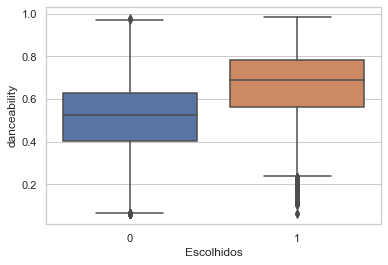

In [36]:
sns.boxplot(x=df['Escolhidos'],y=df['danceability']);

In [37]:
df.dtypes

artist_name          object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
valence             float64
music_genre           int64
Hip-Hop               int64
Escolhidos            int64
dtype: object

In [38]:
df['music_genre'].value_counts()

5    5000
1    5000
7    5000
0    5000
4    5000
8    5000
2    5000
9    5000
3    5000
6    5000
Name: music_genre, dtype: int64

In [42]:
X=['popularity','acousticness', 'danceability','duration_ms', 'energy','instrumentalness', 'liveness','loudness','speechiness', 'valence']
Y=df['Escolhidos']


In [43]:
def regress(Y,X):

    X=df[X]
    model = sm.Logit(Y,X)
    results = model.fit()
    
    return results

In [45]:
results = regress(Y,X)
results.summary()

Optimization terminated successfully.
         Current function value: 0.433640
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Escolhidos   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49990
Method:                           MLE   Df Model:                            9
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.2901
Time:                        15:11:36   Log-Likelihood:                -21682.
converged:                       True   LL-Null:                       -30543.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
popularity           0.0461      0.001     49.852      0.000       0.044       0.048
acousticness        -0.4669      0.053     -8.840      0.000      -0.570      -0.363
danceability         2.9320      0.078     37.756      0.000       2.780       3.084
duration_ms      -1.606e-07   1.04e-07     -1.542      0.123   -3.65e-07    4.35e-08
energy              -6.2516      0.076    -82.065      0.000      -6.401      -6.102
instrumentalness     1.0801      0.048     22.389      0.000       0.986       1.175
liveness            -0.0245      0.082     -0.300      0.764      -0.184       0.135
loudness             0.2125      0.004     54.508      0.000       0.205       0.220
speechiness          8.5446      0.141     60.693      0.000       8.269       8.821
valence              0.1547      0.058      2.648      0.008       0.040       0.269
====================================================================================
"""

In [46]:
X=['popularity','acousticness', 'danceability','duration_ms', 'energy','instrumentalness','loudness','speechiness', 'valence']
results = regress(Y,X)
results.summary()

Optimization terminated successfully.
         Current function value: 0.433641
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Escolhidos   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49991
Method:                           MLE   Df Model:                            8
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.2901
Time:                        15:12:01   Log-Likelihood:                -21682.
converged:                       True   LL-Null:                       -30543.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
popularity           0.0461      0.001     49.866      0.000       0.044       0.048
acousticness        -0.4679      0.053     -8.878      0.000      -0.571      -0.365
danceability         2.9334      0.078     37.835      0.000       2.781       3.085
duration_ms      -1.614e-07   1.04e-07     -1.551      0.121   -3.65e-07    4.26e-08
energy              -6.2577      0.073    -85.219      0.000      -6.402      -6.114
instrumentalness     1.0809      0.048     22.435      0.000       0.986       1.175
loudness             0.2126      0.004     54.931      0.000       0.205       0.220
speechiness          8.5394      0.140     61.142      0.000       8.266       8.813
valence              0.1549      0.058      2.651      0.008       0.040       0.269
====================================================================================
"""

In [47]:
X=['popularity','acousticness', 'danceability', 'energy','instrumentalness','loudness','speechiness', 'valence']
results = regress(Y,X)
results.summary()

Optimization terminated successfully.
         Current function value: 0.433665
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             Escolhidos   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49992
Method:                           MLE   Df Model:                            7
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                  0.2901
Time:                        15:12:36   Log-Likelihood:                -21683.
converged:                       True   LL-Null:                       -30543.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
popularity           0.0461      0.001     49.865      0.000       0.044       0.048
acousticness        -0.4724      0.053     -8.977      0.000      -0.576      -0.369
danceability         2.9292      0.077     37.806      0.000       2.777       3.081
energy              -6.2897      0.071    -89.150      0.000      -6.428      -6.151
instrumentalness     1.0764      0.048     22.384      0.000       0.982       1.171
loudness             0.2141      0.004     56.962      0.000       0.207       0.221
speechiness          8.5529      0.139     61.340      0.000       8.280       8.826
valence              0.1635      0.058      2.809      0.005       0.049       0.277
====================================================================================
"""

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df[X], Y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [50]:
y_test.value_counts()

0    10501
1     4499
Name: Escolhidos, dtype: int64

In [51]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[9663,  838],
       [1874, 2625]], dtype=int64)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88     10501
           1       0.76      0.58      0.66      4499

    accuracy                           0.82     15000
   macro avg       0.80      0.75      0.77     15000
weighted avg       0.81      0.82      0.81     15000



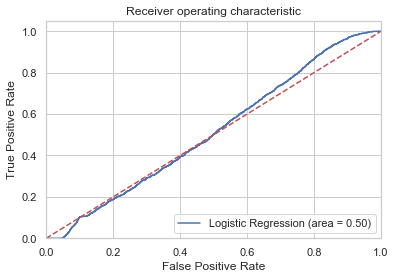

In [50]:
#ROC CURVE

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()